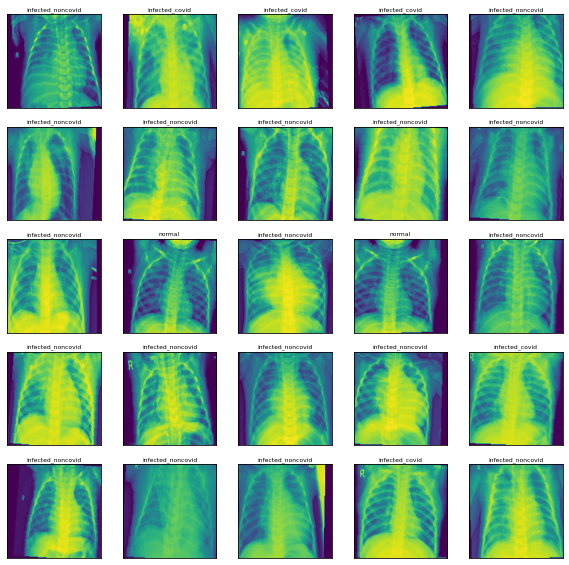

In [1]:
from datasets import LungDataset
from utils import get_dataloaders

import matplotlib.pyplot as plt

from torchvision import transforms

train_transform = transforms.Compose([
    transforms.RandomAffine(degrees=5, translate=(0.1, 0)),
    transforms.RandomResizedCrop((150, 150), scale=(0.9, 1.0), ratio=(0.9, 1.1)),
])

dataloader_args = {
    'dataset_cls'    : LungDataset,
    'root_dir'       : './dataset',
    'train_transform': train_transform,
    'batch_size'     : 25,
}

train_loader, _, _ = get_dataloaders(**dataloader_args)

images, labels = next(iter(train_loader))

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
axes = axes.flatten()

for i in range(25):
    im = images[i].cpu().squeeze(dim=0)
    axes[i].imshow(im)
    axes[i].set_title(train_loader.dataset.classes[labels[i]], size=6, y=0.97)
    axes[i].tick_params(which='both', left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()